# Siren-Distillery Case Study
---
### Checkout Train Log  File Content

## Setup Notebook

### Options

In [1]:
#@title Setup related infos
#@markdown ---
CLONE_GITHUB_PROJECT = True #@param {type:"boolean"}
INSTALL_THIRD_PARTY_LIBS = False #@param {type:"boolean"}
INSTALL_DISTILLER_PIP_REQ = False #@param {type:"boolean"}

In [2]:
#@title Github related infos
#@markdown ---
PROJECT_NAME_PATH = '/content/distiller' #@param {type:"string"}

    
GITHUB_PROJECT_URL = 'https://github.com/franec94/distiller.git' #@param {type:"string"}
BRANCH_NAME = 'siren-support' #@param {type:"string"}
CMD_TOOL_NAME = '' #@param {type:"string"}

In [3]:
#@title Run related infos
#@markdown ---
TARGET_LOG_FILE = "" #@param {type:"string"}
PRJCT_SUB_DIR = "/content/distiller/tmp/utils/graphics_into_shell" #@param {type:"string"}

In [4]:
#@title Running Options:
#@markdown ---
RUN_COLAB_CODE = True #@param {type:"boolean"}
EXEC_DIRECTLY_PY_SCRIPT = False #@param {type:"boolean"}

### Clone Project

In [5]:
import os
os.chdir('/content')

In [6]:
# Setup wd to remove trash

if CLONE_GITHUB_PROJECT:
    # Remove trash
    import os
    if os.path.exists(f'{PROJECT_NAME_PATH}') and os.path.isdir(f'{PROJECT_NAME_PATH}'):
        print("Cleaning from old project...")
        !rm -r {PROJECT_NAME_PATH}
    else:
        print("No project found.")
        pass

    import os
    logs_base_dir = os.path.join("/content/outputs", "summaries")
    os.makedirs(logs_base_dir, exist_ok=True)

    if os.path.exists(PROJECT_NAME_PATH) is False:
        !git clone {GITHUB_PROJECT_URL}
        os.chdir(PROJECT_NAME_PATH)
        !git checkout {BRANCH_NAME}
        if CMD_TOOL_NAME == None or len(CMD_TOOL_NAME) == 0:
            full_path_cmd = os.path.join(PROJECT_NAME_PATH, f'{PROJECT_NAME_PATH}/')
            os.chdir(full_path_cmd)
        else:
            full_path_cmd = os.path.join(PROJECT_NAME_PATH, f'{PROJECT_NAME_PATH}/{CMD_TOOL_NAME}')
            os.chdir(full_path_cmd)
    else:
        os.chdir(PROJECT_NAME_PATH)
        !git checkout {BRANCH_NAME}
        !git fetch
        if CMD_TOOL_NAME == None or len(CMD_TOOL_NAME) == 0:
            full_path_cmd = os.path.join(PROJECT_NAME_PATH, f'{PROJECT_NAME_PATH}/')
            os.chdir(full_path_cmd)
        else:
            full_path_cmd = os.path.join(PROJECT_NAME_PATH, f'{PROJECT_NAME_PATH}/{CMD_TOOL_NAME}')
            os.chdir(full_path_cmd)
        pass
    pass
else:
    print("No github project cloned and no branch activated and switched to!")
    pass

Cleaning from old project...
Cloning into 'distiller'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7815 (delta 0), reused 2 (delta 0), pack-reused 7808
Receiving objects: 100% (7815/7815), 56.29 MiB | 13.36 MiB/s, done.
Resolving deltas: 100% (5522/5522), done.
Branch 'siren-support' set up to track remote branch 'siren-support' from 'origin'.
Switched to a new branch 'siren-support'


In [7]:
# !pip install -e .
if INSTALL_DISTILLER_PIP_REQ:
    !pip install -r requirements.txt

### Libs

In [8]:
# Installing third party dependencies
if INSTALL_THIRD_PARTY_LIBS:
    print("Installing required libraries...")

    old_requirements = '/content/tmp_requirements.txt'
    !pip freeze > {old_requirements}
    dependencies_list = "md-plot,termplot,terminalplot,termplotlib,plotext,stats,pretrainedmodels,torchnet,xlsxwriter,gitpython,python-git,cmapy,sk-video,pytorch-model-summary,ConfigArgParse,tabulate,chart_studio,dash,dash_bootstrap_components".split(",")

    with open(old_requirements) as f:
        old_requirements_list = f.read().split("\n")
        for a_req in dependencies_list:
            found_req = False
            for old_req in old_requirements_list:
                if old_req.startswith(a_req):
                    print(f"{a_req} already installed!")
                    found_req = True
                    break
            if found_req is False:
                !pip install {a_req} -q
        pass
    !rm -f {old_requirements}
    pass

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
%matplotlib inline
from __future__ import print_function
from __future__ import division
import warnings

if RUN_COLAB_CODE:


    # --------------------------------------------- #
    # Standard Library, plus some Third Party Libraries
    # --------------------------------------------- #

    DASH_TEMPLATES_LIST = ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]

    from PIL import Image
    from functools import partial
    from pprint import pprint
    from tqdm import tqdm
    from typing import Tuple, Union


    import configargparse
    import copy
    import collections
    import cProfile
    import datetime
    import functools
    import itertools
    import h5py
    import logging
    import math
    import os
    import operator
    import pickle
    import random
    import shutil
    import sys
    import re
    import tabulate 
    import time
    # import visdom


    from collections import OrderedDict
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    import plotnine as p9
    import md_plot

    # --------------------------------------------- #
    # Data Science and Machine Learning Libraries
    # --------------------------------------------- #
    import matplotlib
    import matplotlib.pyplot as plt
    matplotlib.style.use('ggplot')
    import seaborn as sns

    import numpy as np
    import pandas as pd
    import sklearn

    from sklearn.model_selection import ParameterGrid
    from sklearn.model_selection import train_test_split

    # --------------------------------------------- #
    # Torch
    # --------------------------------------------- #
    import torch
    try:
        import torch
        import torch.nn as nn
        import torch.nn.functional as F
        import torch.optim as optim
        from torch.utils.data import DataLoader, Dataset
        # import torch.quantization
        # import torch.nn.utils.prune as prune

        from torch import nn, optim

    except Exception as err:
        print(err)
        print("torch not available!")
        pass

    from numpy import linalg as LA
    from scipy.stats import rankdata
    from collections import OrderedDict
    from torchvision import datasets, transforms
    from torch.utils.data.sampler import SubsetRandomSampler

    # --------------------------------------------- #
    # Import: torch_pruning
    # --------------------------------------------- #
    # import torch_pruning as tp


    # --------------------------------------------- #
    # Import: TorchVision
    # --------------------------------------------- #
    try:
        import torchvision
        from torchvision import datasets
        from torchvision import transforms
        from torchvision.transforms import Resize, Compose, ToTensor, CenterCrop, Normalize
        from torchvision.utils import save_image
    except:
        print("torchvision library not available!")
        pass

    # Plotly imports.
    # ----------------------------------------------- #
    import chart_studio.plotly as py
    import plotly.figure_factory as ff
    import plotly.express as px

    # --------------------------------------------- #
    # Import: skimage
    # --------------------------------------------- #
    try:
        import skimage
        import skimage.metrics as skmetrics
        from skimage.metrics import peak_signal_noise_ratio as psnr
        from skimage.metrics import structural_similarity as ssim
        from skimage.metrics import mean_squared_error
    except:
        print("skimage library not available!")
        pass

## Run code

In [11]:
try:
    import os
    os.chdir(f'{PRJCT_SUB_DIR}')
except: pass

In [12]:
# !make -f Makefile show_stats_psnr

In [13]:
TARGET_DIR = '/content' #@param {type:"string"}
TARGET_DATE = '___2020.12.15-093035' #@param {type:"string"}
DIR_DEST_OUTPUT = '/content/log_analyses' #@param {type:"string"}
DATA_PATH = '/content/data.txt' #@param {type:"string"}
SPARSITY_DATA_PATH = '/content/sparsity_data.txt' #@param {type:"string"}

### Try Exec via python

In [14]:
try:
    os.chdir('/content/distiller/tmp/utils/graphics_into_shell')
    cmd = f'bash ./filter_log_psnr.sh {TARGET_DIR} {TARGET_DATE} {DIR_DEST_OUTPUT} {DATA_PATH} {SPARSITY_DATA_PATH} > /content/output.txt'
    # cmd = f'bash ./filter_distiller_log_file.sh {TARGET_DIR} {TARGET_DATE} {DIR_DEST_OUTPUT}'
    os.system(f"{cmd}")
    os.chdir('/content/')
except Exception as err:
    print(f"{str(err)}")
    os.chdir('/content/')
    pass

In [15]:
if EXEC_DIRECTLY_PY_SCRIPT:
    try:
        os.chdir('/content/distiller/tmp/utils/graphics_into_shell')
        cmd = f'bash ./filter_log_psnr.sh {TARGET_DIR} {TARGET_DATE} {DIR_DEST_OUTPUT} {DATA_PATH} {SPARSITY_DATA_PATH} > /content/output.txt'
        # cmd = f'bash ./filter_distiller_log_file.sh {TARGET_DIR} {TARGET_DATE} {DIR_DEST_OUTPUT}'
        os.system(f"{cmd}")
        os.chdir('/content/')
        !python3 /content/distiller/tmp/utils/graphics_into_shell/graphics_on_shell.py \
            --output_dir {DIR_DEST_OUTPUT} \
            --input_file {DATA_PATH} \
            --input_file_pruning_trend {SPARSITY_DATA_PATH}   \
            --show_graphics \
            --show_psnr_trend \
            --show_stats_transposed --show_data_from_log \
            --show_not_via_plotex
    except Exception as err:
        print(f"{str(err)}")
        os.chdir('/content/')
    pass

In [16]:
DATA_PATH = '/content/log_analyses/data.csv' #@param {type:"string"}

In [17]:
data_a_run_df = pd.read_csv(f'{DATA_PATH}')
data_a_run_df = data_a_run_df.drop(['Unnamed: 0'], axis = 1)

### Show Plots (via trendline='lowless')

In [18]:
hue = 'Psnr Score'; x = 'bpp'; y = 'Psnr Score'
trenndline = "ols,lowless".split(",")
pos_trenndline = 1
# hover_data = list(data_a_run_df.columns)[0:4+1] # + [y, x]
fig = px.scatter(data_a_run_df[:], y=f"{y}", color=f"{hue}", x=f"{x}",
                 # hover_data = hover_data,
                 trendline=f"{trenndline[pos_trenndline]}",
                 template=DASH_TEMPLATES_LIST[2])
fig.update_layout(template = DASH_TEMPLATES_LIST[2], title_text=f'{y.upper()} vs {x.upper()} | hue={hue.upper()} | Curve={trenndline[pos_trenndline].upper()}')
fig.show()

In [19]:
hue = 'Prune Rate'; x = 'bpp'; y = 'Psnr Score'
trenndline = "ols,lowless".split(",")
pos_trenndline = 1
# hover_data = list(data_a_run_df.columns)[0:4+1] # + [y, x]
fig = px.scatter(data_a_run_df[:], y=f"{y}", color=f"{hue}", x=f"{x}",
                 # hover_data = hover_data,
                 trendline=f"{trenndline[pos_trenndline]}",
                 template=DASH_TEMPLATES_LIST[2])
fig.update_layout(template = DASH_TEMPLATES_LIST[2], title_text=f'{y.upper()} vs {x.upper()} | hue={hue.upper()} | Curve={trenndline[pos_trenndline].upper()}')
fig.show()

In [20]:
hue = 'Psnr Score'; x = 'bpp'; y = 'Prune Rate'
trenndline = "ols,lowless".split(",")
pos_trenndline = 1
# hover_data = list(data_a_run_df.columns)[0:4+1] # + [y, x]
fig = px.scatter(data_a_run_df[:], y=f"{y}", color=f"{hue}", x=f"{x}",
                 # hover_data = hover_data,
                 trendline=f"{trenndline[pos_trenndline]}",
                 template=DASH_TEMPLATES_LIST[2])
fig.update_layout(template = DASH_TEMPLATES_LIST[2], title_text=f'{y.upper()} vs {x.upper()} | hue={hue.upper()} | Curve={trenndline[pos_trenndline].upper()}')
fig.show()

### Show Plots (via trendline='ols')

In [21]:
hue = 'Psnr Score'; x = 'bpp'; y = 'Psnr Score'
trenndline = "ols,lowless".split(",")
pos_trenndline = 0
# hover_data = list(data_a_run_df.columns)[0:4+1] # + [y, x]
fig = px.scatter(data_a_run_df[:], y=f"{y}", color=f"{hue}", x=f"{x}",
                 # hover_data = hover_data,
                 marginal_x="box",
                 marginal_y="box",
                 trendline=f"{trenndline[pos_trenndline]}",
                 template=DASH_TEMPLATES_LIST[2])
fig.update_layout(template = DASH_TEMPLATES_LIST[2], title_text=f'{y.upper()} vs {x.upper()} | hue={hue.upper()} | Curve={trenndline[pos_trenndline].upper()}')
fig.show()

In [22]:
hue = 'Prune Rate'; x = 'bpp'; y = 'Psnr Score'
trenndline = "ols,lowless".split(",")
pos_trenndline = 0
# hover_data = list(data_a_run_df.columns)[0:4+1] # + [y, x]
fig = px.scatter(data_a_run_df[:], y=f"{y}", color=f"{hue}", x=f"{x}",
                 # hover_data = hover_data,
                 marginal_x="box",
                 marginal_y="box",
                 trendline=f"{trenndline[pos_trenndline]}",
                 template=DASH_TEMPLATES_LIST[2])
fig.update_layout(template = DASH_TEMPLATES_LIST[2], title_text=f'{y.upper()} vs {x.upper()} | hue={hue.upper()} | Curve={trenndline[pos_trenndline].upper()}')
fig.show()

In [23]:
hue = 'Psnr Score'; x = 'bpp'; y = 'Prune Rate'
trenndline = "ols,lowless".split(",")
pos_trenndline = 0
# hover_data = list(data_a_run_df.columns)[0:4+1] # + [y, x]
fig = px.scatter(data_a_run_df[:], y=f"{y}", color=f"{hue}", x=f"{x}",
                 # hover_data = hover_data,
                 marginal_x="box",
                 marginal_y="box",
                 trendline=f"{trenndline[pos_trenndline]}",
                 template=DASH_TEMPLATES_LIST[2])
fig.update_layout(template = DASH_TEMPLATES_LIST[2], title_text=f'{y.upper()} vs {x.upper()} | hue={hue.upper()} | Curve={trenndline[pos_trenndline].upper()}')
fig.show()

### sns plots plots

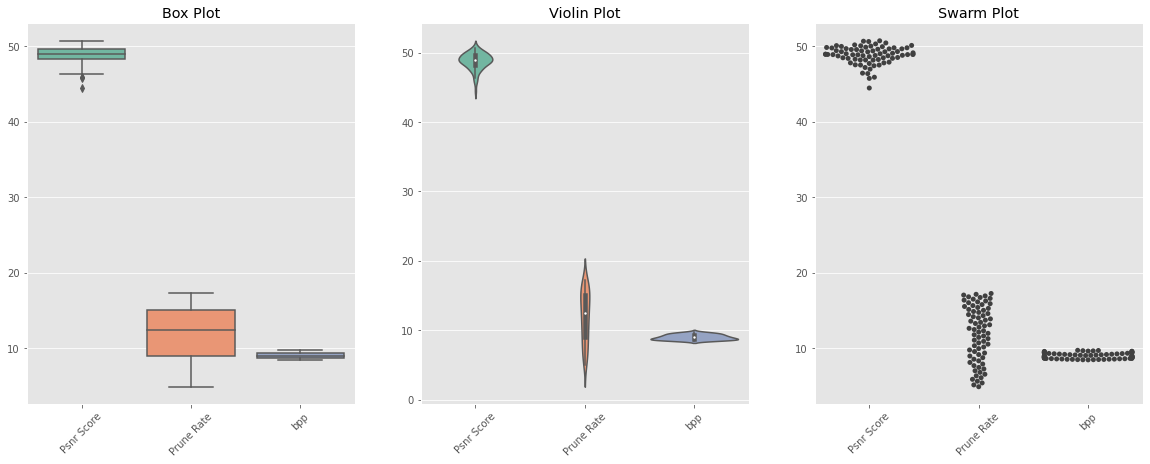

In [24]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fig, axes = plt.subplots(1, data_a_run_df.shape[1], figsize = (20, 7))
    ax = sns.boxplot(data=data_a_run_df, orient="v", palette="Set2", ax = axes[0])
    ax.set_title("Box Plot")
    ax.tick_params(axis='x', rotation=45)

    ax = sns.violinplot(data=data_a_run_df, orient="v", palette="Set2", ax=axes[1])
    ax.set_title("Violin Plot")
    ax.tick_params(axis='x', rotation=45)

    ax = sns.swarmplot( data=data_a_run_df, color=".25", ax = axes[2])
    ax.set_title("Swarm Plot")
    ax.tick_params(axis='x', rotation=45)
    
    plt.show()
    pass

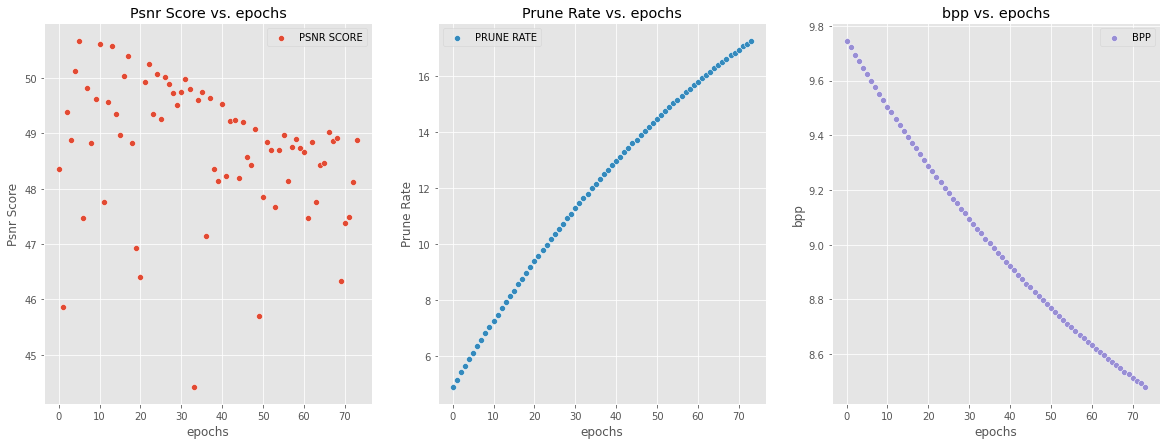

In [25]:
fig, axes = plt.subplots(1, data_a_run_df.shape[1], figsize = (20, 7))
colors = sns.color_palette()
for ii, attr in enumerate(data_a_run_df.columns):
    ax = axes[ii]
    ax = sns.scatterplot(data=data_a_run_df[f'{attr}'], palette=f"Set2", ax = ax, color=colors[ii], label=f"{attr.upper()}")
    ax.set_xlabel("epochs")
    ax.set_title(f"{attr} vs. epochs")
    pass
plt.show()

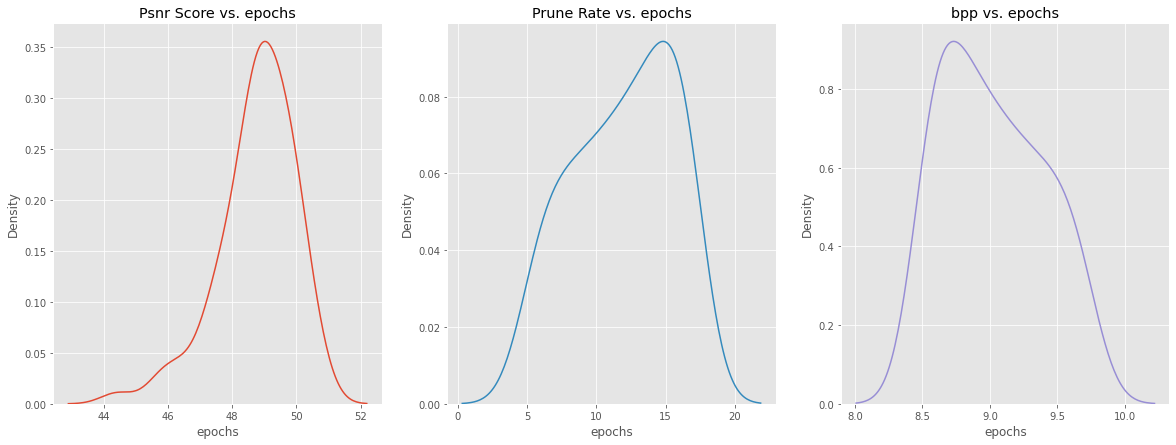

In [26]:
fig, axes = plt.subplots(1, data_a_run_df.shape[1], figsize = (20, 7))
colors = sns.color_palette()
for ii, attr in enumerate(data_a_run_df.columns):
    ax = axes[ii]
    ax = sns.kdeplot(data=data_a_run_df[f'{attr}'], palette=f"Set2", ax = ax, color=colors[ii], label=f"{attr.upper()}")
    ax.set_xlabel("epochs")
    ax.set_title(f"{attr} vs. epochs")
    pass
plt.show()

### Mirrored Density Plots (via md_plot pypi package)

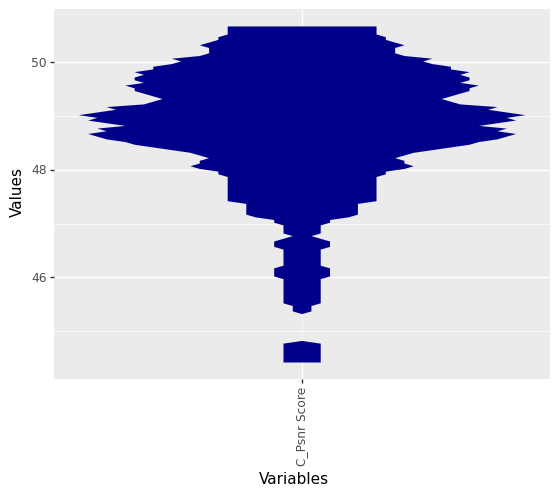

<ggplot: (-9223363268177111303)>


In [27]:
x = 'Psnr Score'
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    print(md_plot.MDplot(data_a_run_df[x]))

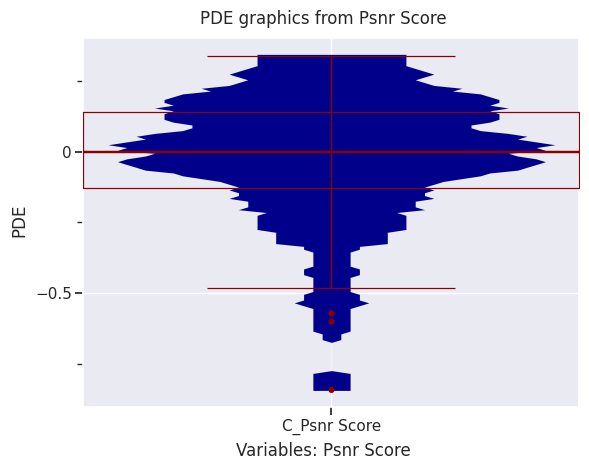

<ggplot: (-9223363268177250970)>


In [28]:
x = 'Psnr Score'
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    styled_md_plot = md_plot.MDplot(data_a_run_df[x], BoxPlot = True, Scaling='CompleteRobust') \
        + p9.labels.ggtitle(f'PDE graphics from {x}') \
        + p9.labels.ylab('PDE') \
        + p9.labels.xlab(f'Variables: {x}') \
        + p9.theme_seaborn()
    print(styled_md_plot)
    pass

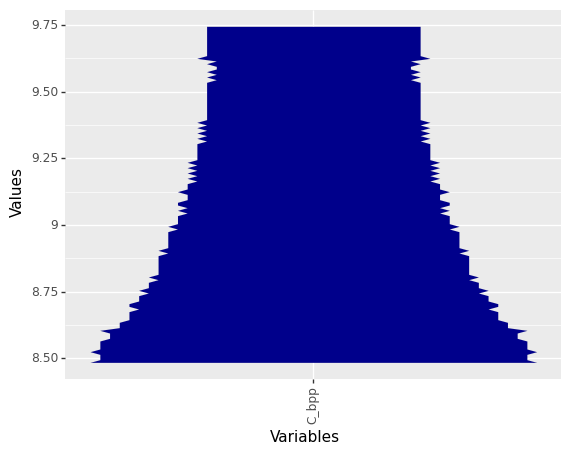

<ggplot: (8768678250111)>


In [29]:
x = 'bpp'
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    print(md_plot.MDplot(data_a_run_df[x]))

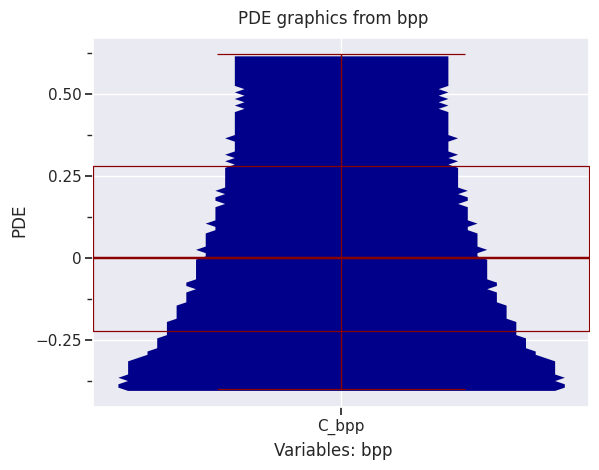

<ggplot: (8768677408246)>


In [30]:
x = 'bpp' # 'bpp' 'Prune Rate'
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    styled_md_plot = md_plot.MDplot(data_a_run_df[x], BoxPlot = True, Scaling='CompleteRobust') \
        + p9.labels.ggtitle(f'PDE graphics from {x}') \
        + p9.labels.ylab('PDE') \
        + p9.labels.xlab(f'Variables: {x}') \
        + p9.theme_seaborn()
    print(styled_md_plot)
    pass

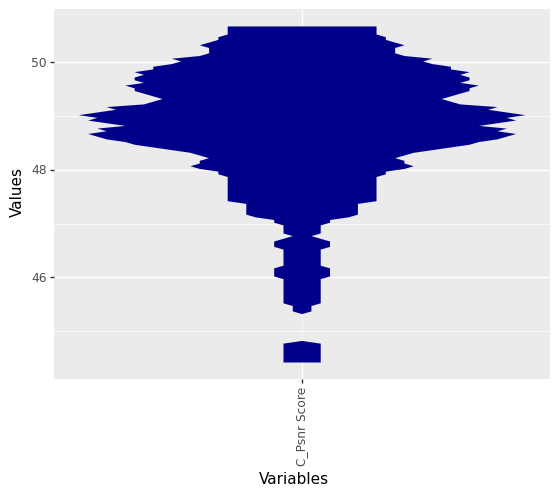

<ggplot: (-9223363268176622627)>


In [31]:
x = 'Prune Rate'
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    print(md_plot.MDplot(data_a_run_df[hue]))

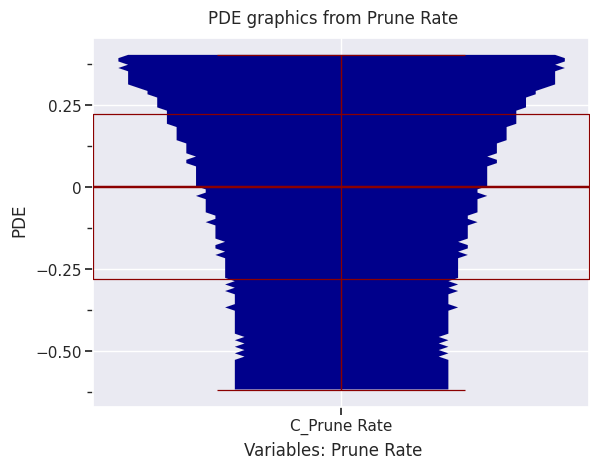

<ggplot: (-9223363268177111422)>


In [32]:
x = 'Prune Rate' # 'bpp' 'Prune Rate'
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    styled_md_plot = md_plot.MDplot(data_a_run_df[x], BoxPlot = True, Scaling='CompleteRobust') \
        + p9.labels.ggtitle(f'PDE graphics from {x}') \
        + p9.labels.ylab('PDE') \
        + p9.labels.xlab(f'Variables: {x}') \
        + p9.theme_seaborn()
    print(styled_md_plot)
    pass

### Violin Plots via plotly

In [33]:
y = 'Psnr Score'
# fig = px.violin(data_a_run_df, y=f"{y}", x=f"{x}", color=f"{hue}", box=True, points="all",
fig = px.violin(data_a_run_df, y=f"{y}", box=True, points="all",
          hover_data=data_a_run_df.columns)
fig.update_layout(template = DASH_TEMPLATES_LIST[2], title_text=f'Violin plot: {y.upper()}')
fig.show()

In [34]:
y = 'bpp'
# fig = px.violin(data_a_run_df, y=f"{y}", x=f"{x}", color=f"{hue}", box=True, points="all",
fig = px.violin(data_a_run_df, y=f"{y}", box=True, points="all",
          hover_data=data_a_run_df.columns)
fig.update_layout(template = DASH_TEMPLATES_LIST[2], title_text=f'Violin plot: {y.upper()}')
fig.show()

In [35]:
hue = 'Psnr Score'; x = 'bpp'; y = 'Prune Rate'
# fig = px.violin(data_a_run_df, y=f"{y}", x=f"{x}", color=f"{hue}", box=True, points="all",
fig = px.violin(data_a_run_df, y=f"{y}", box=True, points="all",
          hover_data=data_a_run_df.columns)
fig.update_layout(template = DASH_TEMPLATES_LIST[2], title_text=f'Violin plot: {y.upper()}')
fig.show()

## References

- [Linear Fits](https://plotly.com/python/linear-fits/) -> for plot data.
- [Local regression](https://en.wikipedia.org/wiki/Local_regression) -> for creating fitting curve.
- [Ordinary Linear Least Square Regression](https://en.wikipedia.org/wiki/Ordinary_least_squares) -> for plotting also fitting curve.
- [md-plot](https://md-plot.readthedocs.io/en/latest/) -> for last violin plots